In [78]:
import os

import contextily as ctx
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from matplotlib import cm

In [86]:
enriched_points = dd.read_csv(
    "./anglova_metrics_enriched/points_enriched_metrics.csv",
).compute()
enriched_points["t"] = pd.to_datetime(enriched_points["t"])
enriched_trajectories_df = pd.read_csv(
    "./anglova_metrics_enriched/trajectories_enriched_metrics.csv",
)
output_path = "./assets/Spatial Projection/"
pallete = "Set1"
pallete2 = "Set2"

In [80]:
def save_plot(filename):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(
        f"{output_path}/{filename}.png",
        bbox_inches="tight",
    )
    plt.savefig(
        f"{output_path}/{filename}.pdf",
        bbox_inches="tight",
    )

In [81]:
cud_okabe_ito_colors = [
    "#E69F00",  # orange
    "#56B4E9",  # sky blue
    "#009E73",  # green
    "#F0E442",  # yellow
    "#0072B2",  # blue
    "#D55E00",  # reddish orange
    "#CC79A7",  # purple
    "#000000",  # black
]

C:\Users\edgar\AppData\Local\Temp\ipykernel_18072\3615819622.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right", fontsize=8)


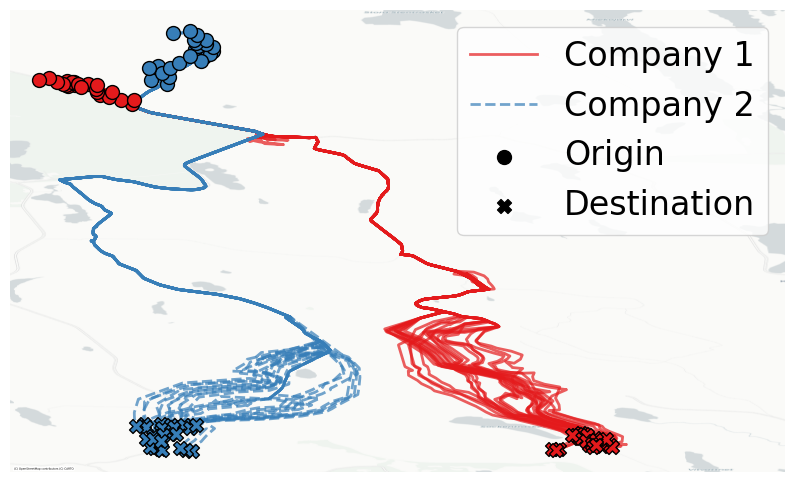

In [82]:
filtered_data = enriched_points[
    enriched_points['Company'].isin([1, 2])
]
category = "Company"
df = enriched_points[
    enriched_points["trajectory_id"].isin(filtered_data["trajectory_id"])
]
# Ordena por id e tempo
df = df.sort_values(by=["trajectory_id", "t"])

# Converte para GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)
gdf = gdf.to_crs(epsg=3857)

# Obtém os limites do GeoDataFrame (em EPSG:3857)
bbox = gdf.total_bounds  # [minx, miny, maxx, maxy]

# Calcula a margem (5% do tamanho em cada eixo)
margin_x = (bbox[2] - bbox[0]) * 0.05
margin_y = (bbox[3] - bbox[1]) * 0.05

# Aplica a margem aos limites
minx = bbox[0] - margin_x
maxx = bbox[2] + margin_x
miny = bbox[1] - margin_y
maxy = bbox[3] + margin_y

# Pega categorias únicas e define um mapa de cores
categorias = sorted(gdf[category].unique())
# Cria um plot agregado antes de todos os outros
fig, ax = plt.subplots(figsize=(10, 6))
ax.legend(loc="upper right", fontsize=8)
for _, traj in gdf.groupby("trajectory_id"):
    color = sns.color_palette(pallete, len(categorias))[
        categorias.index(traj[category].iloc[0]) % len(categorias)
    ]
    line_styles = ["-", "--", ":", "-.",  (0, (3, 5, 1, 5)), (0, (5, 10))]
    line_style = line_styles[
        categorias.index(traj[category].iloc[0]) % len(line_styles)
    ]
    ax.plot(
        traj.geometry.x,
        traj.geometry.y,
        line_style,
        color=color,
        linewidth=2,
        alpha=0.7,
        label=f"{category} {traj[category].iloc[0]}",  # Add legend for each trajectory
    )
    start_point = traj.groupby("trajectory_id").first()
    end_point = traj.groupby("trajectory_id").last()
    ax.scatter(
        start_point.geometry.x,
        start_point.geometry.y,
        color=color,
        edgecolor="black",  # Add black border to the marker
        marker="o",
        s=100,
        zorder=3,
    )
    ax.scatter(
        end_point.geometry.x,
        end_point.geometry.y,
        color=color,
        edgecolor="black",  # Add black border to the marker
        marker="X",
        s=100,
        zorder=3,
    )
# ax.set_title(f"{category}", fontsize=16)
ax.legend()
ax.scatter([], [], color='black', edgecolor='black', marker='o', s=100, label='Origin')
ax.scatter([], [], color='black', edgecolor='black', marker='X', s=100, label='Destination')
ax.legend(loc="upper right", fontsize=10)
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(
    unique_labels.values(),
    unique_labels.keys(),
    loc="upper right",
    fontsize=24,
)
ax.axis("off")
# # Extend the bounding box of the plot
ax.set_xlim(
    ax.get_xlim()[0],
    ax.get_xlim()[1] + 0.2 * (ax.get_xlim()[1] - ax.get_xlim()[0]),
)
ax.set_ylim(
    ax.get_ylim()[0],
    ax.get_ylim()[1] + 0 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
)
ctx.add_basemap(
    ax,
    crs=gdf.crs.to_string(),
    source=ctx.providers.CartoDB.Positron,
    attribution_size=2,
)
# Add legend for origin and destination markers

save_plot("Company_1_2")
plt.show()


C:\Users\edgar\AppData\Local\Temp\ipykernel_18072\1806569504.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right", fontsize=8)


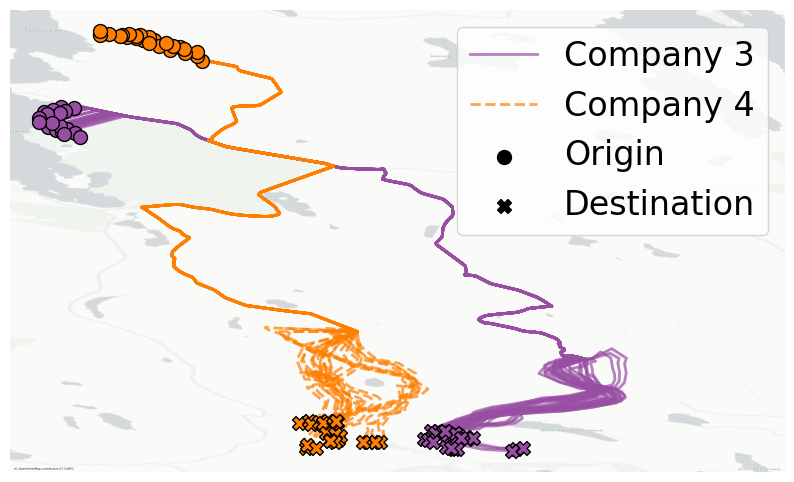

In [83]:
filtered_data = enriched_points[
    enriched_points['Company'].isin([3, 4])
]
category = "Company"
df = enriched_points[
    enriched_points["trajectory_id"].isin(filtered_data["trajectory_id"])
]
# Ordena por id e tempo
df = df.sort_values(by=["trajectory_id", "t"])

# Converte para GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)
gdf = gdf.to_crs(epsg=3857)

# Obtém os limites do GeoDataFrame (em EPSG:3857)
bbox = gdf.total_bounds  # [minx, miny, maxx, maxy]

# Calcula a margem (5% do tamanho em cada eixo)
margin_x = (bbox[2] - bbox[0]) * 0.05
margin_y = (bbox[3] - bbox[1]) * 0.05

# Aplica a margem aos limites
minx = bbox[0] - margin_x
maxx = bbox[2] + margin_x
miny = bbox[1] - margin_y
maxy = bbox[3] + margin_y

# Pega categorias únicas e define um mapa de cores
categorias = sorted(gdf[category].unique())
# Cria um plot agregado antes de todos os outros
fig, ax = plt.subplots(figsize=(10, 6))
ax.legend(loc="upper right", fontsize=8)
for _, traj in gdf.groupby("trajectory_id"):
    color = sns.color_palette(pallete, 6)[
        (traj[category].iloc[0])
    ]
    line_styles = ["-", "--", ":", "-.",  (0, (3, 5, 1, 5)), (0, (5, 10))]
    line_style = line_styles[
        categorias.index(traj[category].iloc[0]) % len(line_styles)
    ]
    ax.plot(
        traj.geometry.x,
        traj.geometry.y,
        line_style,
        color=color,
        linewidth=2,
        alpha=0.7,
        label=f"{category} {traj[category].iloc[0]}",  # Add legend for each trajectory
    )
    start_point = traj.groupby("trajectory_id").first()
    end_point = traj.groupby("trajectory_id").last()
    ax.scatter(
        start_point.geometry.x,
        start_point.geometry.y,
        color=color,
        edgecolor="black",  # Add black border to the marker
        marker="o",
        s=100,
        zorder=3,
    )
    ax.scatter(
        end_point.geometry.x,
        end_point.geometry.y,
        color=color,
        edgecolor="black",  # Add black border to the marker
        marker="X",
        s=100,
        zorder=3,
    )
# ax.set_title(f"{category}", fontsize=16)
ax.legend()
ax.scatter([], [], color='black', edgecolor='black', marker='o', s=100, label='Origin')
ax.scatter([], [], color='black', edgecolor='black', marker='X', s=100, label='Destination')
ax.legend(loc="upper right", fontsize=10)
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(
    unique_labels.values(),
    unique_labels.keys(),
    loc="upper right",
    fontsize=24,
)
ax.axis("off")
# # Extend the bounding box of the plot
ax.set_xlim(
    ax.get_xlim()[0],
    ax.get_xlim()[1] + 0.2 * (ax.get_xlim()[1] - ax.get_xlim()[0]),
)
ax.set_ylim(
    ax.get_ylim()[0],
    ax.get_ylim()[1] + 0 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
)
ctx.add_basemap(
    ax,
    crs=gdf.crs.to_string(),
    source=ctx.providers.CartoDB.Positron,
    attribution_size=2,
)
# Add legend for origin and destination markers

save_plot("Company_3_4")
plt.show()


C:\Users\edgar\AppData\Local\Temp\ipykernel_18072\1690917541.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right", fontsize=8)


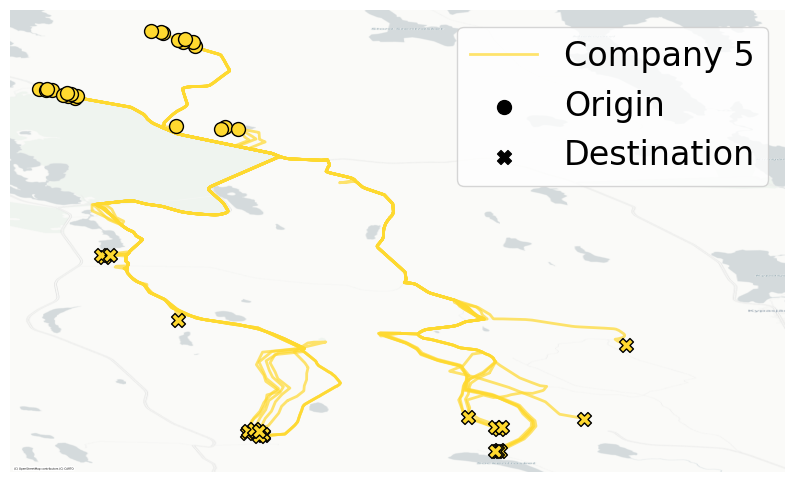

In [87]:
filtered_data = enriched_points[
    enriched_points['Company'].isin([5])
]
category = "Company"
df = enriched_points[
    enriched_points["trajectory_id"].isin(filtered_data["trajectory_id"])
]
# Ordena por id e tempo
df = df.sort_values(by=["trajectory_id", "t"])

# Converte para GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)
gdf = gdf.to_crs(epsg=3857)

# Obtém os limites do GeoDataFrame (em EPSG:3857)
bbox = gdf.total_bounds  # [minx, miny, maxx, maxy]

# Calcula a margem (5% do tamanho em cada eixo)
margin_x = (bbox[2] - bbox[0]) * 0.05
margin_y = (bbox[3] - bbox[1]) * 0.05

# Aplica a margem aos limites
minx = bbox[0] - margin_x
maxx = bbox[2] + margin_x
miny = bbox[1] - margin_y
maxy = bbox[3] + margin_y

# Pega categorias únicas e define um mapa de cores
categorias = sorted(gdf[category].unique())

# Cria um plot agregado antes de todos os outros
fig, ax = plt.subplots(figsize=(10, 6))
ax.legend(loc="upper right", fontsize=8)
for _, traj in gdf.groupby("trajectory_id"):
    color = sns.color_palette(pallete2, 6)[
        (traj[category].iloc[0])
    ]
    line_styles = ["-", "--", ":", "-.",  (0, (3, 5, 1, 5)), (0, (5, 10))]
    line_style = line_styles[
        categorias.index(traj[category].iloc[0]) % len(line_styles)
    ]
    ax.plot(
        traj.geometry.x,
        traj.geometry.y,
        line_style,
        color=color,
        linewidth=2,
        alpha=0.7,
        label=f"{category} {traj[category].iloc[0]}",  # Add legend for each trajectory
    )
    start_point = traj.groupby("trajectory_id").first()
    end_point = traj.groupby("trajectory_id").last()
    ax.scatter(
        start_point.geometry.x,
        start_point.geometry.y,
        color=color,
        edgecolor="black",  # Add black border to the marker
        marker="o",
        s=100,
        zorder=3,
    )
    ax.scatter(
        end_point.geometry.x,
        end_point.geometry.y,
        color=color,
        edgecolor="black",  # Add black border to the marker
        marker="X",
        s=100,
        zorder=3,
    )
# ax.set_title(f"{category}", fontsize=16)
ax.legend()
ax.scatter([], [], color='black', edgecolor='black', marker='o', s=100, label='Origin')
ax.scatter([], [], color='black', edgecolor='black', marker='X', s=100, label='Destination')
ax.legend(loc="upper right", fontsize=10)
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(
    unique_labels.values(),
    unique_labels.keys(),
    loc="upper right",
    fontsize=24,
)
ax.axis("off")
# # Extend the bounding box of the plot
ax.set_xlim(
    ax.get_xlim()[0],
    ax.get_xlim()[1] + 0.2 * (ax.get_xlim()[1] - ax.get_xlim()[0]),
)
ax.set_ylim(
    ax.get_ylim()[0],
    ax.get_ylim()[1] + 0 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
)
ctx.add_basemap(
    ax,
    crs=gdf.crs.to_string(),
    source=ctx.providers.CartoDB.Positron,
    attribution_size=2,
)
# Add legend for origin and destination markers

save_plot("Company_5")
plt.show()


C:\Users\edgar\AppData\Local\Temp\ipykernel_18072\4119863102.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right", fontsize=8)


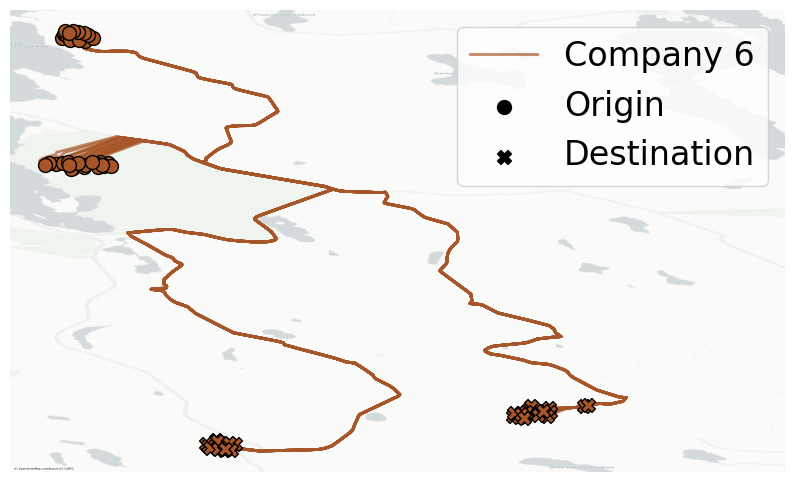

In [85]:
filtered_data = enriched_points[
    enriched_points['Company'].isin([6])
]
category = "Company"
df = enriched_points[
    enriched_points["trajectory_id"].isin(filtered_data["trajectory_id"])
]
# Ordena por id e tempo
df = df.sort_values(by=["trajectory_id", "t"])

# Converte para GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y), crs="EPSG:4326"
)
gdf = gdf.to_crs(epsg=3857)

# Obtém os limites do GeoDataFrame (em EPSG:3857)
bbox = gdf.total_bounds  # [minx, miny, maxx, maxy]

# Calcula a margem (5% do tamanho em cada eixo)
margin_x = (bbox[2] - bbox[0]) * 0.05
margin_y = (bbox[3] - bbox[1]) * 0.05

# Aplica a margem aos limites
minx = bbox[0] - margin_x
maxx = bbox[2] + margin_x
miny = bbox[1] - margin_y
maxy = bbox[3] + margin_y

# Pega categorias únicas e define um mapa de cores
categorias = sorted(gdf[category].unique())

# Cria um plot agregado antes de todos os outros
fig, ax = plt.subplots(figsize=(10, 6))
ax.legend(loc="upper right", fontsize=8)
for _, traj in gdf.groupby("trajectory_id"):
    color = sns.color_palette(pallete, 7)[
        (traj[category].iloc[0])
    ]
    line_styles = ["-", "--", ":", "-.",  (0, (3, 5, 1, 5)), (0, (5, 10))]
    line_style = line_styles[
        categorias.index(traj[category].iloc[0]) % len(line_styles)
    ]
    ax.plot(
        traj.geometry.x,
        traj.geometry.y,
        line_style,
        color=color,
        linewidth=2,
        alpha=0.7,
        label=f"{category} {traj[category].iloc[0]}",  # Add legend for each trajectory
    )
    start_point = traj.groupby("trajectory_id").first()
    end_point = traj.groupby("trajectory_id").last()
    ax.scatter(
        start_point.geometry.x,
        start_point.geometry.y,
        color=color,
        edgecolor="black",  # Add black border to the marker
        marker="o",
        s=100,
        zorder=3,
    )
    ax.scatter(
        end_point.geometry.x,
        end_point.geometry.y,
        color=color,
        edgecolor="black",  # Add black border to the marker
        marker="X",
        s=100,
        zorder=3,
    )
# ax.set_title(f"{category}", fontsize=16)
ax.legend()
ax.scatter([], [], color='black', edgecolor='black', marker='o', s=100, label='Origin')
ax.scatter([], [], color='black', edgecolor='black', marker='X', s=100, label='Destination')
ax.legend(loc="upper right", fontsize=10)
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(
    unique_labels.values(),
    unique_labels.keys(),
    loc="upper right",
    fontsize=24,
)
ax.axis("off")
# # Extend the bounding box of the plot
ax.set_xlim(
    ax.get_xlim()[0],
    ax.get_xlim()[1] + 0.2 * (ax.get_xlim()[1] - ax.get_xlim()[0]),
)
ax.set_ylim(
    ax.get_ylim()[0],
    ax.get_ylim()[1] + 0 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
)
ctx.add_basemap(
    ax,
    crs=gdf.crs.to_string(),
    source=ctx.providers.CartoDB.Positron,
    attribution_size=2,
)
# Add legend for origin and destination markers

save_plot("Company_6")
plt.show()
